In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/teitelbaumsair/Desktop/Open-Source-Projects/Chargeflow/Task 1-4/CANDYLAND - task1-4.csv')
df['dispute_created_at'] = pd.to_datetime(df['dispute_created_at'])

In [3]:
df.head()

,dispute_id,dispute_created_at,disputed_usd_amount,dispute_status,dispute_reason,transaction_created_at,card_country,merchant_name,merchant_category
0,7ad529a1-5240-465a-8c26-c645a181af7b,2020-01-01 02:24:52,3.16,won,damaged_product,2019-12-27 15:45:15,Israel,candyland,foodstuffs
1,948d6ca7-0743-467c-a42e-17599f136d03,2020-01-01 05:21:00,6.18,lost,damaged_product,2019-12-27 19:22:25,Israel,candyland,foodstuffs
2,92465c58-da9c-48e2-8a7b-8eb30e3789a4,2020-01-01 06:55:51,2.69,won,product_not_received,2019-12-28 1:06:54,Israel,candyland,foodstuffs
3,adc29016-f634-4e26-aaa8-ed17d90d3d85,2020-01-01 15:38:58,16.77,lost,fraud,2019-12-28 13:03:41,Israel,candyland,foodstuffs
4,29685b97-8687-487e-a9b4-de18c174e5a6,2020-01-02 05:40:54,18.64,lost,damaged_product,2019-12-29 12:30:25,Israel,candyland,foodstuffs


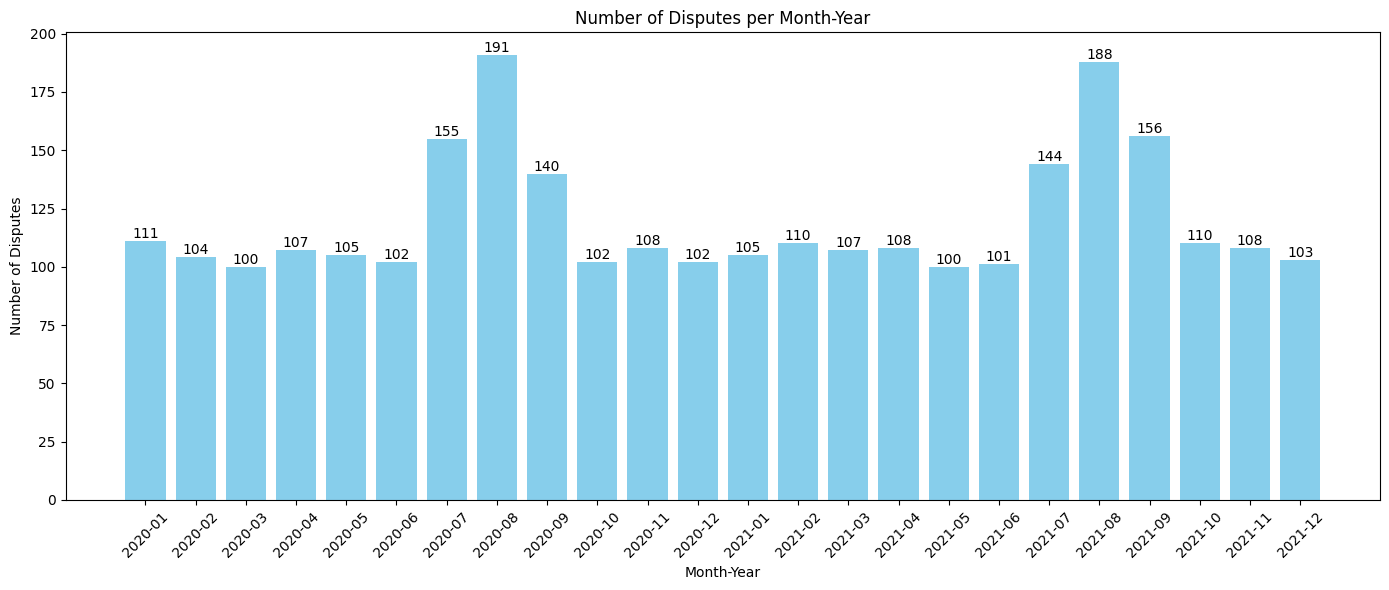

In [ ]:
#Task 1.1

df['month_year'] = df['dispute_created_at'].dt.to_period('M')
monthly_disputes = df.groupby('month_year').size().reset_index(name='dispute_count')

plt.figure(figsize=(14,6))
bars = plt.bar(monthly_disputes['month_year'].astype(str), monthly_disputes['dispute_count'], color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom')

plt.title('Number of Disputes per Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Number of Disputes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Task 1.2

resolved_disputes = df[df['dispute_status'].isin(['won', 'lost'])]
total_won = (resolved_disputes['dispute_status'] == 'won').sum()
total_resolved = len(resolved_disputes)
win_rate = (total_won / total_resolved) * 100
win_rate_formatted = f"{win_rate:.2f}%"

print("CandyLand's overall win rate:", win_rate_formatted)

CandyLand's overall win rate: 52.51%


In [12]:
#Task 2 Analysis

resolved_disputes = df[df['dispute_status'].isin(['won', 'lost'])]
total_won = (resolved_disputes['dispute_status'] == 'won').sum()
total_resolved = len(resolved_disputes)
candyland_win_rate = round((total_won / total_resolved) * 100, 2)

benchmark_data = {
    "merchant_name": [
        "sweetTooth", "teaAndCoffeeStore", "bookBarn", "trendyThreads", "homeEssentials", "petpet", "glowBeauty",
        "gums", "spicyKitchen", "lolipopHeaven", "mugHalfFull", "pixelPlay", "subStream", "coinGalaxy",
        "firefly", "readio", "VPNzone"
    ],
    "merchant_category": [
        "foodstuffs", "foodstuffs", "books", "clothing", "home_appliances", "animals", "cosmetics", "healthcare",
        "restaurants", "furniture", "beverages", "digital_gaming", "digital_entertainment", "crypto",
        "cloud tech s.a.a.s.", "digital_books", "cybersecurity s.a.a.s."
    ],
    "overall_win_rate": [
        54.80, 51.70, 58.60, 48.20, 53.80, 51.70, 59.10, 57.70, 50.90, 51.40,
        55.20, 64.30, 65.40, 64.10, 68.90, 64.60, 67.90
    ]
}

benchmark_df = pd.DataFrame(benchmark_data)

peers = benchmark_df[benchmark_df['merchant_category'] == 'foodstuffs']

print("CandyLand's Overall Win Rate:", f"{candyland_win_rate}%\n")
print("Foodstuffs Peer Comparison:\n", peers[['merchant_name', 'overall_win_rate']])


print("\n Summary for Customer Success:\n")
print(f"1. CandyLand’s win rate is {candyland_win_rate}%. That places it between TeaAndCoffeeStore (51.70%) and SweetTooth (54.80%). Performance is healthy but slightly below the top peer.")
print("2. Merchants compared to: sweetTooth, teaAndCoffeeStore")
print("3. Reason for selection: These merchants share the same category'foodstuffs' making them the most relevant peers for comparison.")



CandyLand's Overall Win Rate: 52.51%

Foodstuffs Peer Comparison:
        merchant_name  overall_win_rate
0         sweetTooth              54.8
1  teaAndCoffeeStore              51.7

 Summary for Customer Success:

1. CandyLand’s win rate is 52.51%. That places it between TeaAndCoffeeStore (51.70%) and SweetTooth (54.80%). Performance is healthy but slightly below the top peer.
2. Merchants compared to: sweetTooth, teaAndCoffeeStore
3. Reason for selection: These merchants share the same category'foodstuffs' making them the most relevant peers for comparison.


##Task 3

Dispute rate is also an important KPI to track, as it shows how often customers are disputing charges and speaks directly to trust, experience, and operational risk.

#Task 4
*Thought Process*
- First party Misuse = occurs when an individual intentionally misrepresents information or manipulates their own account to obtain goods, services, or financial benefits they are not entitled to.
- How to detect it?
    - Based on basic research some methods include: Common attributes (same email address or phone number, for example), Multiple parties using the same account, Short paths between transactions (a rapid return of a purchase with no support call or reason given, for example)



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df["dispute_created_at"] = pd.to_datetime(df["dispute_created_at"])
df["transaction_created_at"] = pd.to_datetime(df["transaction_created_at"])

In [ ]:
duplicates = df[df.duplicated("dispute_id")]
print("Duplicated dispute_id entries:")
print(duplicates)

Duplicated dispute_id entries:
                              dispute_id  dispute_created_at  \
10  c7bb0e08-5ccb-4578-99af-78565f276c06 2020-01-02 21:21:09   

    disputed_usd_amount dispute_status dispute_reason transaction_created_at  \
10                  6.0           lost          fraud    2019-12-30 06:17:58   

   card_country merchant_name merchant_category  dispute_delay_days  
10       Israel     candyland        foodstuffs                   3  


In [ ]:
summary_stats = df.describe(include='all')
print("\nSummary Statistics:")
print(summary_stats)


Summary Statistics:
                                  dispute_id             dispute_created_at  \
count                                   2866                           2867   
unique                                  2865                            NaN   
top     c7bb0e08-5ccb-4578-99af-78565f276c06                            NaN   
freq                                       2                            NaN   
mean                                     NaN  2021-01-06 01:31:23.218695680   
min                                      NaN            2020-01-01 02:24:52   
25%                                      NaN            2020-07-19 20:22:39   
50%                                      NaN            2021-01-02 16:27:54   
75%                                      NaN            2021-07-23 02:12:04   
max                                      NaN            2021-12-31 10:33:02   
std                                      NaN                            NaN   

        disputed_usd_amount di

In [ ]:
#Dispute Reasons Count
dispute_reason_counts = df["dispute_reason"].value_counts()
print("\nDispute Reasons Count:")
print(dispute_reason_counts)


Dispute Reasons Count:
dispute_reason
fraud                   1184
product_not_received     667
damaged_product          503
credit_not_processed     318
unrecognized             195
Name: count, dtype: int64


In [ ]:
#Dispute Status Count
dispute_status_counts = df["dispute_status"].value_counts()
print("\nDispute Status Count:")
print(dispute_status_counts)


Dispute Status Count:
dispute_status
won     1505
lost    1361
open       1
Name: count, dtype: int64


In [ ]:
#Repeated Transaction Timestamps (possible abuse)
transaction_time_counts = df["transaction_created_at"].value_counts()
suspicious_transactions = transaction_time_counts[transaction_time_counts > 1]
print("\nSuspiciously Repeated Transaction Timestamps:")
print(suspicious_transactions)


Suspiciously Repeated Transaction Timestamps:
transaction_created_at
2020-01-30 16:12:48    2
2019-12-30 06:17:58    2
Name: count, dtype: int64


/var/folders/_7/7nx4t_6s6995xg_cj866wrmr0000gn/T/ipykernel_98877/1698816547.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  win_rates = df.groupby("dispute_reason").apply(
/var/folders/_7/7nx4t_6s6995xg_cj866wrmr0000gn/T/ipykernel_98877/1698816547.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


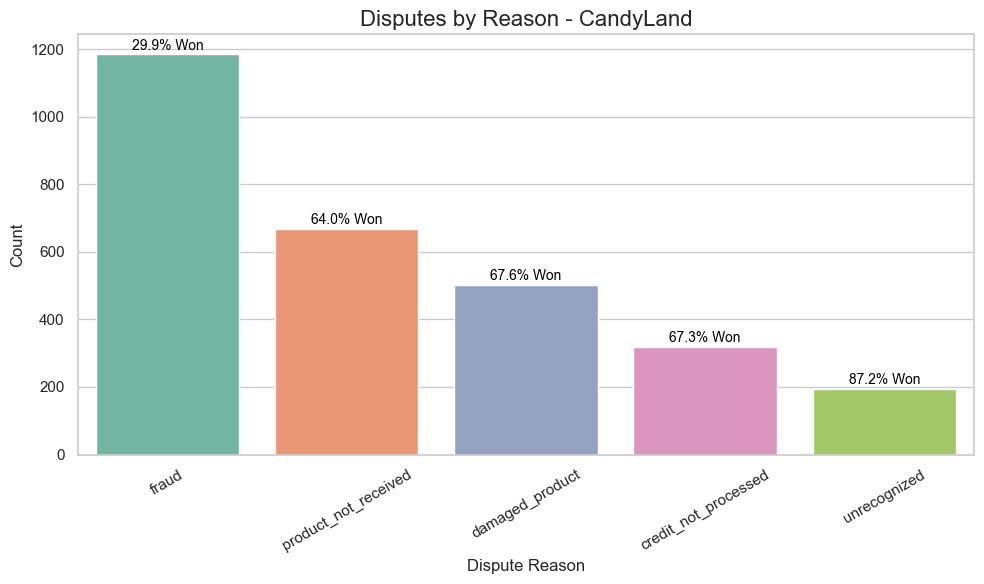

In [42]:
win_rates = df.groupby("dispute_reason").apply(
    lambda x: (x["dispute_status"] == "won").sum() / len(x) * 100
).round(1)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df,
    x="dispute_reason",
    order=dispute_reason_counts.index,
    palette="Set2"
)
for p in ax.patches:
    reason = p.get_x() + p.get_width() / 2
    height = p.get_height()
    label = ax.get_xticklabels()[int(p.get_x() + 0.5)].get_text()
    rate = win_rates[label]
    ax.annotate(f'{rate}% Won', (p.get_x() + p.get_width() / 2, height + 5),
                ha='center', va='bottom', fontsize=10, color='black')
plt.title("Disputes by Reason - CandyLand", fontsize=16)
plt.xlabel("Dispute Reason", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

##Task 4 Answers:

- Excessive Fraud Disputes: 41% of all disputes (1,184 out of 2,867) are labeled as “fraud”, which is high for a single merchant and suggests potential First Party Misuse.

- Repeat Transactions Flagged: Two identical transaction timestamps appear more than once.

- Many disputes are won even for “fraud”: Over half of all disputes (52%) are won by customers, including many labeled as “fraud.” This could mean that customers are taking advantage of easy refund policies.